In [1]:
## UL-networkx-draft

import matplotlib.pyplot as plt
import networkx as nx
import csv

# Establish variables to be filled with public transport data
stops = {}
stopsOnTrip = {}
routes = {}

# Load metadata about each stop (hållplats) in Uppsala
with open('./gtfs_static_data_ul/stops.csv') as file:
    reader = csv.DictReader(file)
    # Create dictionary key for each row in stops.csv with values on name, latitude and longitude
    for row in reader:
        stops[row['stop_id']] = {'stop_name': row['stop_name'],
                                 'stop_lat': row['stop_lat'], 'stop_lon': row['stop_lon']}

# Load data on when all trips (avgångar) pass each stop (hållplats) in Uppsala
with open('./gtfs_static_data_ul/stop_times.csv') as file:
    reader1 = csv.DictReader(file)
    # Loops through stop_times.csv and creates dictionary with stops per unique trip
    for row in reader1:
        if row['trip_id'] not in stopsOnTrip:
            stopsOnTrip[row['trip_id']] = [stops[row['stop_id']]]
        if row['trip_id'] in stopsOnTrip:
            stopsOnTrip[row['trip_id']].append(stops[row['stop_id']])

# Load data on all trips (avgångar) in Uppsala
with open('./gtfs_static_data_ul/trips.csv') as file:
    reader2 = csv.DictReader(file)
    # Loops through trips.csv and creates dictionary with the first trip per unique route
    for row in reader2:
        if row['route_id'] not in routes:
            routes[row['route_id']] = stopsOnTrip[row['trip_id']]
     
G = nx.Graph()

G.add_nodes_from(stops)

nx.draw_spectral(G,with_labels=False,node_size=10)
plt.figure()

<Figure size 640x480 with 0 Axes>

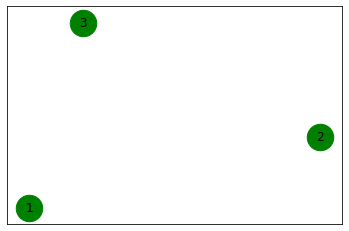

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib  inline

G = nx.Graph()

# nodes
G.add_node(1)
G.add_nodes_from([2, 3])

nx.draw_networkx(G,node_color='green',node_size=700)

In [11]:
# edges
G.add_edge(1,2)

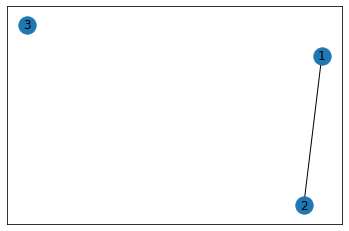

In [12]:
nx.draw_networkx(G)

In [13]:
# we can also add edges using unpack edge tuples

e = (2,3)
G.add_edge(*e)

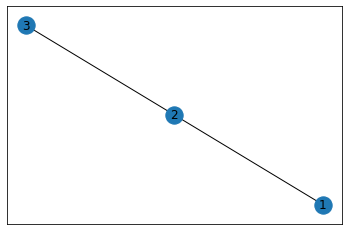

In [14]:
nx.draw_networkx(G)

In [15]:
# adding a list of edges

G.add_edges_from([(1,2),(1,3)])

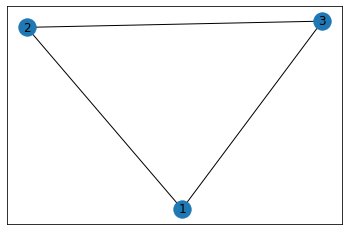

In [16]:
nx.draw_networkx(G)

In [17]:
# find numbers of nodes in a graph
print(G.number_of_nodes())

3


In [18]:
# get some properties of a graph
print(G.nodes())

[1, 2, 3]


In [19]:
# getting the number of edges in a graph
print(G.edges())

[(1, 2), (1, 3), (2, 3)]


In [27]:
# getting the neighbor of a connected graph
print(list(G.neighbors(1)))

[2, 3]


In [32]:
# getting the degrees, i.e. the number of connected edges to each node
print(G.degree())

[(1, 2), (2, 2), (3, 2)]


In [38]:
# find if a tuple of nodes has an edge, in this case between node 2 and 3
print(G.has_edge(2,3))

True


In [40]:
# find if there exist a node in a graph
print(G.has_node(2))

True


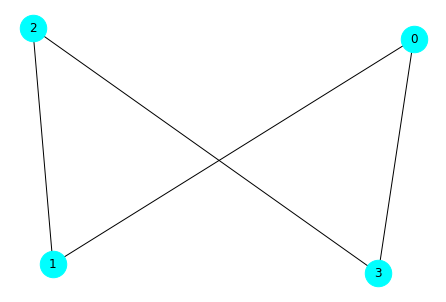

In [45]:
# Node manipulation
H = nx.Graph()
edgelist = [(0,1),(1,2),(2,3),(0,3)]
H.add_edges_from(edgelist)
nx.draw(H,with_labels=True,node_color='cyan',node_size=700)

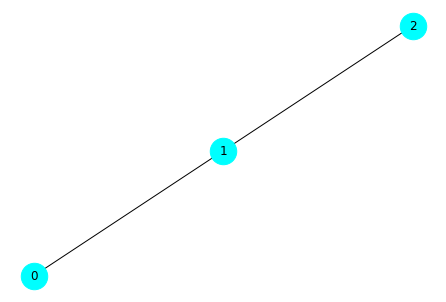

In [46]:
H.remove_node(3)
nx.draw(H,with_labels=True,node_color='cyan',node_size=700)

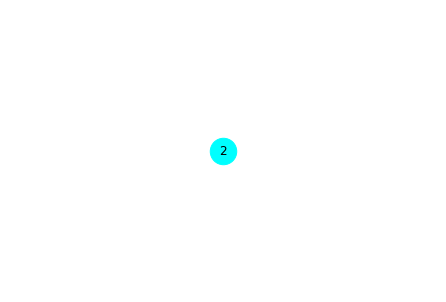

In [47]:
# Remove a list of nodes
H.remove_nodes_from([0,1])
nx.draw(H,with_labels=True,node_color='cyan',node_size=700)

In [48]:
# Adding attributes to our graph
B = nx.Graph(weekday='Friday',year=2015,month='December',day=12)
B.graph['day']=21

In [49]:
B.graph

{'weekday': 'Friday', 'year': 2015, 'month': 'December', 'day': 21}

In [52]:
B.graph['year']=2016
B.graph['month']='January'
B.graph

{'weekday': 'Friday', 'year': 2016, 'month': 'January', 'day': 21}

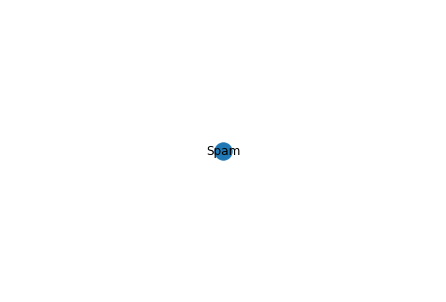

In [54]:
B.add_node("Spam")
nx.draw(B,with_labels=True)

In [59]:
D=nx.Graph(name='Hello World Graph')
D.add_node(1,name='ben',email='ben@benford.com',age=45)
D.add_node(2,name='john',email='john@gmail.com',age=34)
D.add_node(3,name='cletus',email='c@f.com',age=24)
D.add_node(4,name='emanuel',email='emma@gmail.com',age=99)

In [60]:
print(nx.info(D))

Name: Hello World Graph
Type: Graph
Number of nodes: 4
Number of edges: 0
Average degree:   0.0000


In [61]:
print(D.nodes(data=True))

[(1, {'name': 'ben', 'email': 'ben@benford.com', 'age': 45}), (2, {'name': 'john', 'email': 'john@gmail.com', 'age': 34}), (3, {'name': 'cletus', 'email': 'c@f.com', 'age': 24}), (4, {'name': 'emanuel', 'email': 'emma@gmail.com', 'age': 99})]


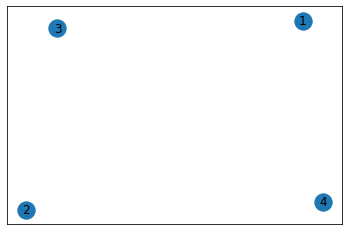

In [63]:
# Draw the graph
nx.draw_networkx(D)

In [64]:
H = nx.Graph()
H.add_edge(1,2,weight=4.7)

In [65]:
H.add_edges_from([(3,4),(4,5)],color="cyan")

In [66]:
H.add_edges_from([(1,2,{'color':'blue'}),(2,3,{'weight':8})])

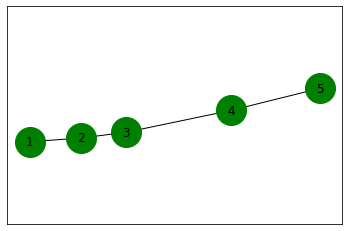

In [70]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
nx.draw_networkx(H,with_labels=True,node_color='green',node_size=900)

In [71]:
# Assess edge from 2 to 3
H[2][3]['weight']=4.7

In [73]:
H.edges(data = True)

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (2, 3, {'weight': 4.7}), (3, 4, {'color': 'cyan'}), (4, 5, {'color': 'cyan'})])

In [81]:
# Adding attributes to our graph
cities = nx.Graph()

In [84]:
cities.add_edge('San Diego','L.A.',attr_dict={'distance':0.4})
cities.add_edge('New York','Nashville',attr_dict={'distance':5.6})
cities.add_edge('Boston','D.C.',attr_dict={'distance':0.8})

In [86]:
cities.edges(data=True)

EdgeDataView([('San Diego', 'L.A.', {'attr_dict': {'distance': 0.4}}), ('New York', 'Nashville', {'attr_dict': {'distance': 5.6}}), ('Boston', 'D.C.', {'attr_dict': {'distance': 0.8}})])

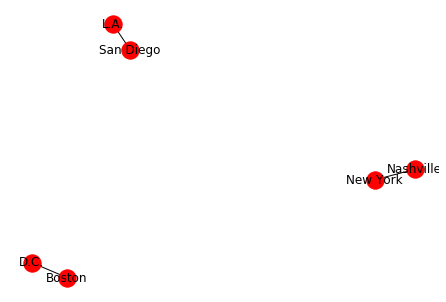

In [90]:
nx.draw(cities,node_color="red", with_labels=True)

In [91]:
# Directed graph

b = nx.DiGraph([('a','b'),('b','c'),('c','a')])

In [93]:
# Adding edges to the di-graph
b.add_edge('a','b')
b.add_edges_from([('d','c'),('d','b')])

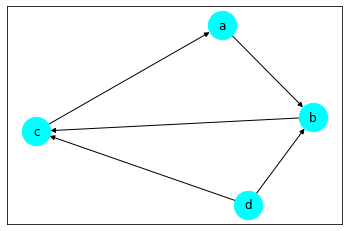

In [94]:
nx.draw_networkx(b,with_labels=True,node_size=800,node_color="cyan")

In [95]:
print(b.out_degree())

[('a', 1), ('b', 1), ('c', 1), ('d', 2)]


In [96]:
print(b.in_degree())

[('a', 1), ('b', 2), ('c', 2), ('d', 0)]


In [97]:
print(b.in_edges())

[('c', 'a'), ('a', 'b'), ('d', 'b'), ('b', 'c'), ('d', 'c')]


In [98]:
print(b.out_edges())

[('a', 'b'), ('b', 'c'), ('c', 'a'), ('d', 'c'), ('d', 'b')]


In [99]:
print(nx.degree_centrality(b))

{'a': 0.6666666666666666, 'b': 1.0, 'c': 1.0, 'd': 0.6666666666666666}


In [101]:
print(nx.betweenness_centrality(b))

{'a': 0.16666666666666666, 'b': 0.16666666666666666, 'c': 0.3333333333333333, 'd': 0.0}


In [102]:
# Multi-Graphs

G = nx.MultiGraph()

In [103]:
G.add_node(1)

In [107]:
G.add_nodes_from([2,3])
G.add_nodes_from(range(100,110))

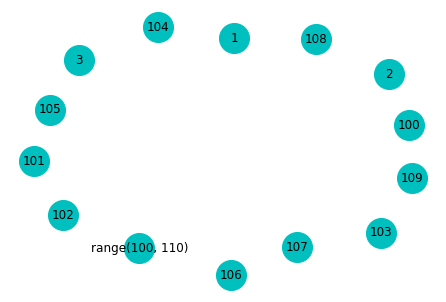

In [108]:
nx.draw(G,node_color='c',node_size=900,with_labels=True)

In [109]:
GM = nx.MultiGraph(day='Friday',month='December',year=2015)

In [110]:
GM.graph

{'day': 'Friday', 'month': 'December', 'year': 2015}

In [119]:
GM.add_node(1,time='10pm')

In [120]:
GM.node[1]

{'time': '10pm', 'location': 345}

In [122]:
GM.add_edge(1,2,weight=4.7)

2

In [124]:
GM.add_edges_from([(3,4),(4,5)],color="red")

[0, 0]

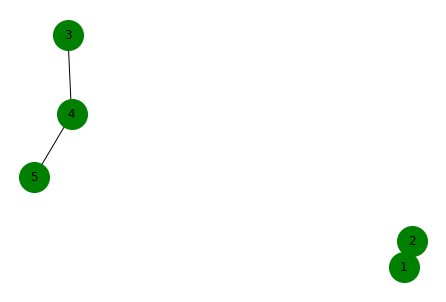

In [125]:
nx.draw(GM,node_color='green',node_size=900,with_labels=True)

In [126]:
GM.nodes(data=True)

NodeDataView({1: {'time': '10pm', 'location': 345}, 2: {}, 3: {}, 4: {}, 5: {}})

In [127]:
GM.edges(data=True)

MultiEdgeDataView([(1, 2, {'weight': 4.7}), (1, 2, {'weight': 4.7}), (1, 2, {'weight': 4.7}), (3, 4, {'color': 'red'}), (4, 5, {'color': 'red'})])

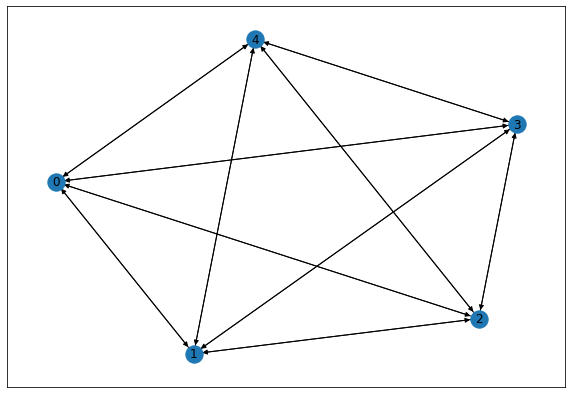

In [128]:
# Graph generators

plt.figure(figsize=(10,7))
cg = nx.complete_graph(5,create_using=nx.DiGraph())
nx.draw_networkx(cg)

In [130]:
print(cg.out_degree())

[(0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


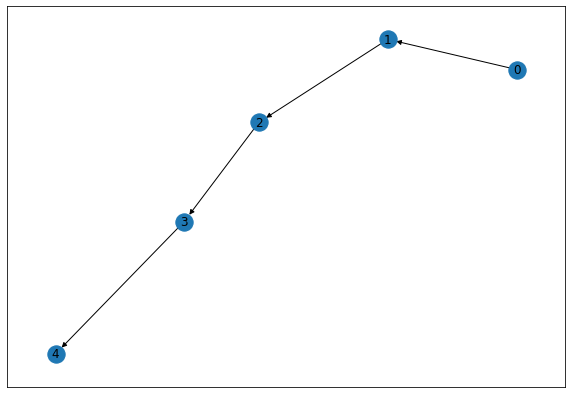

In [134]:
# Draw a graph called path-graph

plt.figure(figsize=(10,7))
pg = nx.path_graph(5,create_using=nx.DiGraph())
nx.draw_networkx(pg)

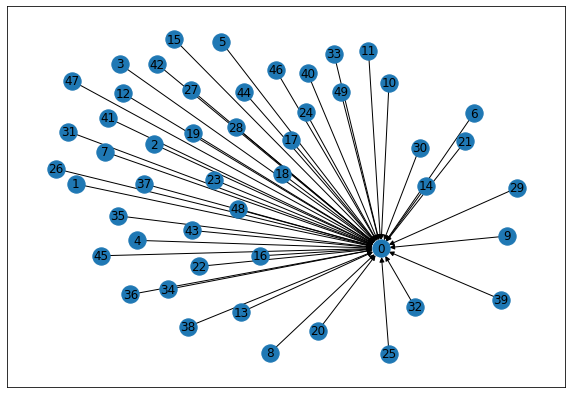

In [140]:
# Draw a gmr-graph

plt.figure(figsize=(10,7))
gnr = nx.gnr_graph(50,1,create_using=nx.DiGraph())
nx.draw_networkx(gnr)

In [142]:
print(gnr.out_degree)

[(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)]


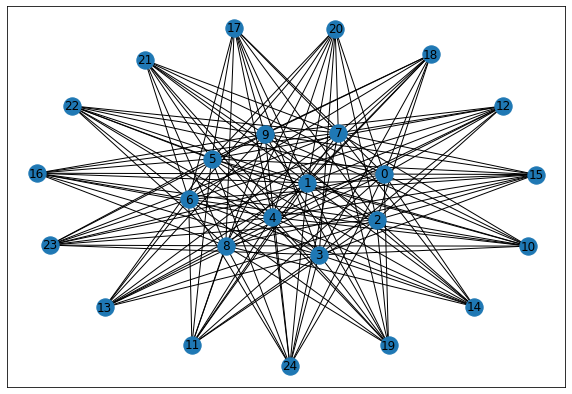

In [145]:
# Draw complete-bipartite-graph
plt.figure(figsize=(10,7))
cbg = nx.complete_bipartite_graph(10,15)
nx.draw_networkx(cbg)

In [146]:
# Number of nodes
print(cbg.order())

25


In [147]:
# Number of edges that has been connected to the nodes
print(cbg.size())

150


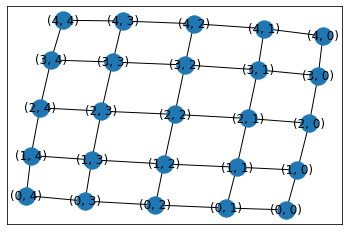

In [148]:
gg = nx.grid_graph(dim=[5,5])
nx.draw_networkx(gg)

# Shortest path

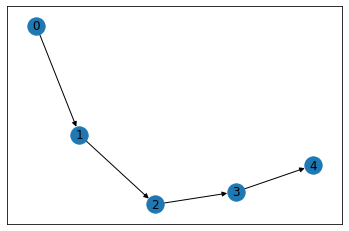

In [150]:
N = nx.path_graph(5,create_using=nx.DiGraph())
nx.draw_networkx(N)

In [152]:
# Find the shortest path from node 0 to node 4
print(nx.shortest_path(N,source=2,target=4))

[2, 3, 4]


In [154]:
# Shortest path from zero to each other node
print(nx.shortest_path(N,source=0))

{0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]}


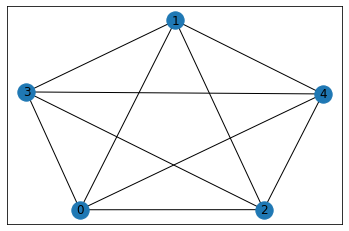

In [155]:
# Clustering coefficient

CC = nx.complete_graph(5)
nx.draw_networkx(CC)

In [157]:
# Each of the nodes has a clustering coeffient of 1.0
print(nx.clustering(CC))
print(nx.average_clustering(CC))

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}
1.0


In [158]:
def draw_graph():
    G = nx.Graph()
    G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])
    nx.draw(G)

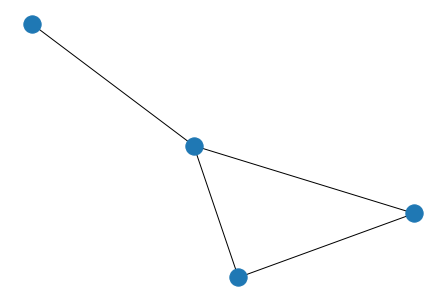

In [161]:
draw_graph()

In [162]:
def draw_barabasi_albert():
    G=nx.barabasi_albert_graph(100,10)
    hst=nx.degree_histogram(G)
    plt.hist(hst,bins=20,color='red')

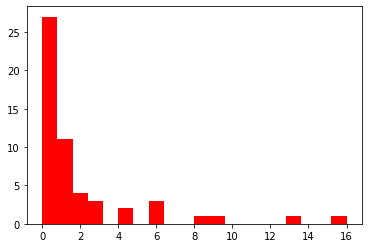

In [163]:
draw_barabasi_albert()